In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("customer.csv")
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1809,4,485.333333,2,18.0,19,345.383333,0.000000,0.005797,0.000000,0.0,Mar,3,2,3,8,New_Visitor,True,False
3324,3,110.500000,0,0.0,10,284.000000,0.000000,0.008333,0.000000,1.0,May,1,8,1,11,New_Visitor,True,False
11424,1,70.500000,0,0.0,28,1398.937500,0.014286,0.016270,17.463961,0.0,Nov,3,2,3,1,Returning_Visitor,False,False
10614,0,0.000000,0,0.0,7,202.250000,0.000000,0.028571,0.000000,0.0,Dec,1,1,2,2,Returning_Visitor,False,False
2248,2,14.500000,0,0.0,23,316.333333,0.008333,0.030833,0.000000,1.0,May,2,2,2,4,Returning_Visitor,True,False


In [3]:
df.shape

(12330, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.reset_index(inplace = True)
X_test.reset_index(inplace = True)

# Data analysis and visualization

Text(0.5, 1.0, 'Revenue generated or not based on count of visitors')

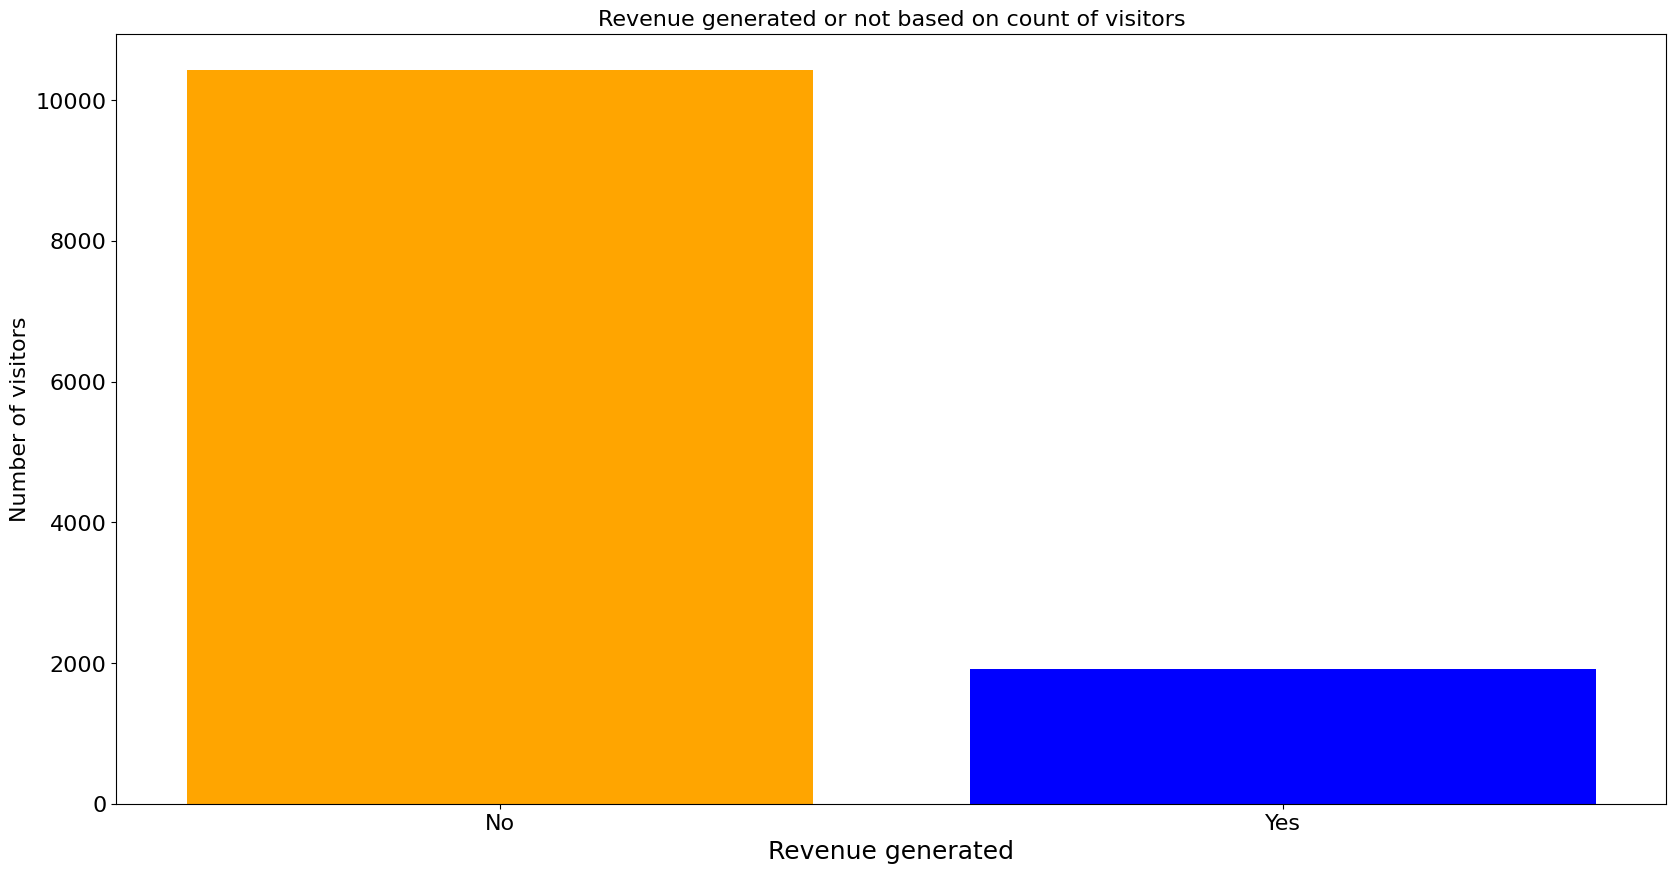

In [8]:
target_variable = y.value_counts()

plt.figure(figsize = (20, 10))
plt.bar(target_variable.keys().tolist(), target_variable.tolist(), color = ['orange', 'blue'])

plt.xlabel('Revenue generated', fontsize = 18)
plt.ylabel('Number of visitors', fontsize = 16)
plt.xticks([0.0, 1.0], ['No', 'Yes'], fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Revenue generated or not based on count of visitors', fontsize = 16)

In [9]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
df_numeric = df.drop(columns=non_numeric_columns)

corr = df_numeric.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301


In [10]:
X_train = X_train.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)
X_test = X_test.drop(['Administrative', 'Informational', 'ProductRelated'], axis = 1)

In [11]:
X_train.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)
X_test.drop(['OperatingSystems', 'Region', 'TrafficType'], axis = 1, inplace = True)

# Encoding categorical columns

In [12]:

labelEncoder = LabelEncoder()
X_train.loc[:, 'Month'] = labelEncoder.fit_transform(X_train.loc[:, 'Month'])
X_test.loc[:, 'Month'] = labelEncoder.transform(X_test.loc[:, 'Month'])
X_train.loc[:, 'VisitorType'] = labelEncoder.fit_transform(X_train.loc[:, 'VisitorType'])
X_test.loc[:, 'VisitorType'] = labelEncoder.transform(X_test.loc[:, 'VisitorType'])
X_train.loc[:, 'Weekend'] = labelEncoder.fit_transform(X_train.loc[:, 'Weekend'])
X_test.loc[:, 'Weekend'] = labelEncoder.transform(X_test.loc[:, 'Weekend'])

In [13]:

onehotencoder = OneHotEncoder(categories = 'auto', drop = 'first')
train_cat_features = onehotencoder.fit_transform(X_train.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
train_cat_features = pd.DataFrame(train_cat_features)
test_cat_features = onehotencoder.transform(X_test.loc[:, ['Month', 'Browser', 'VisitorType']]).toarray()
test_cat_features = pd.DataFrame(test_cat_features)

X_train.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_train = X_train.join(train_cat_features)
X_test.drop(['Month', 'Browser', 'VisitorType'], axis = 1, inplace = True)
X_test = X_test.join(test_cat_features)

In [14]:
df.columns = df.columns.astype(str)
df.drop(['VisitorType','Weekend','Revenue'], axis =1 , inplace = True)
df



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11


In [15]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# Scaling the data

In [16]:
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)


In [17]:
%matplotlib inline

import os
import tensorflow
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics

# Model generation

In [18]:
classifier = Sequential()
classifier.add(Dense(units = 128, activation = 'relu', input_dim = 32))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(rate = 0.6))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(rate = 0.4))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

C:\Users\Amit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,785 (339.00 KB)

 Trainable params: 86,785 (339.00 KB)

 Non-trainable params: 0 (0.00 B)

# Training and evaluating the model

In [19]:
history = classifier.fit(X_train, y_train, epochs = 50, shuffle = False, validation_split = 0.1)


Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8377 - loss: 0.4770 - val_accuracy: 0.8683 - val_loss: 0.3211
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8629 - loss: 0.3527 - val_accuracy: 0.8804 - val_loss: 0.2938
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8774 - loss: 0.3159 - val_accuracy: 0.8855 - val_loss: 0.2717
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8874 - loss: 0.2935 - val_accuracy: 0.8845 - val_loss: 0.2755
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8877 - loss: 0.2868 - val_accuracy: 0.8815 - val_loss: 0.2655
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8953 - loss: 0.2753 - val_accuracy: 0.8845 - val_loss: 0.2649
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8980 - loss: 0.2773 - val_accuracy: 0.8886 - val_loss: 0.2649
Epoch 8/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8992 - loss: 0.2655 - val_accuracy: 0.

In [20]:

y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion matrix:
[[1958   97]
 [ 178  233]]
Accuracy: 88.85%
